# Procesamiento Digital de Audio
## Caleb Rascón
### Separación de Fuentes en Línea

#### GSC - Generalized Sidelobe Canceller

In [41]:
#Bibliotecas
import numpy as np
from numpy import pi
from numpy.fft import fft, ifft
from matplotlib import pyplot as plt
from delay_f import delay_f
from trianglewave import trianglewave

In [42]:
#Setup
doa1 = 20 * pi/180  #Direction of arrival of first signal
doa2 = -40 * pi/180 #Direction of arrival of second signal

doa_steer = doa2 #Direction to steer the beamformer (original: doa1)

d = 4 #Distance betwee microphones in meters
M = 8 #Number of microphones (original: 8)

mu = 0.001 #Adaptation rate

N = 200 #Signal size in samples

### Simulating signals
t = np.arange(1,N+1)/N #Time vector (1 second)
c = 343            #Speed of sound
fs = N             #Sampling frequency same as signal size (1 second)

### Original signals
s1 = np.cos(2*pi*2*t)
s2 = trianglewave(10,N)*.5



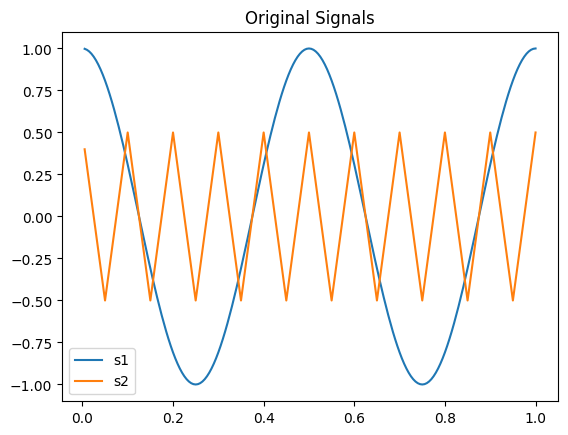

In [43]:
plt.title('Original Signals')
plt.plot(t,s1, label='s1')
plt.plot(t,s2, label='s2')
plt.legend()
plt.show()


In [44]:
#Microphones (input signals)
X = np.zeros((M,N))
X[0,:] = s1 + s2
for m in range(M):
  X[m,:] = delay_f(s1, (m*d/c)*np.sin(doa1),N) + delay_f(s2, (m*d/c)*np.sin(doa2), N)

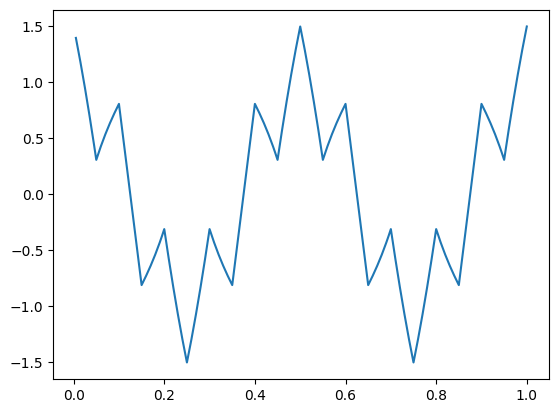

In [45]:
plt.plot(t,X[0,:])
plt.show()

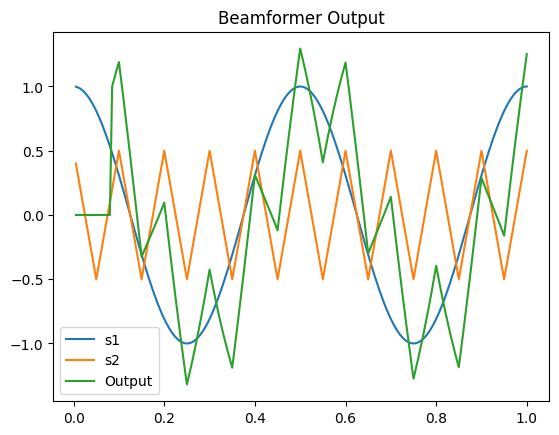

In [46]:
### Doing GSC throughout time
# Applying the appropriate delays to input signals
for m in range(1, M):
    X[m, :] = delay_f(X[m, :], -(m * d / c) * np.sin(doa_steer), N)

# Calculating the upper part of GSC
y_u = np.sum(X, axis=0) / M

# Calculating the lower part
x_n = np.zeros((M-1, N))
for m in range(M-1):
    x_n[m, :] = X[m+1, :] - X[m, :]

y_n = np.sum(x_n, axis=0)

# Applying beamformer
Nw = 16
o = np.zeros(N)
g = np.zeros((M-1, Nw))

for k in range(Nw, N):
    this_y_u = y_u[k]
    this_x_n = x_n[:, k-Nw:k]
    this_y_n = np.sum(np.sum(g * this_x_n))
    o[k] = this_y_u - this_y_n

    # Updating filters
    g = g + mu * o[k] * this_x_n


plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.plot(t, o,  label='Output')
plt.legend()
plt.title('Beamformer Output')
# plt.axis([0, 1, -1, 1])
plt.show()